# Acknowledgement

Dataset ini berasal dari [Kaggle](https://www.kaggle.com/competitions/ndsc-regression-cholesterol-prediction/data)

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from xgboost import XGBRegressor
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


id - Nomor identifikasi unik untuk setiap karyawan.

Jenis Kelamin - Jenis kelamin karyawan (misalnya, 'M' untuk Laki-laki, 'F' untuk Perempuan).

Usia - Usia karyawan dalam tahun.

Tekanan darah (S) - Tekanan darah sistolik karyawan, yaitu angka atas dalam pengukuran tekanan darah (misalnya, dalam mmHg).

Tekanan darah (D) - Tekanan darah diastolik karyawan, yaitu angka bawah dalam pengukuran tekanan darah (misalnya, dalam mmHg).

Tinggi badan (cm) - Tinggi badan karyawan dalam sentimeter.

Berat badan (kg) - Berat badan karyawan dalam kilogram.

IMT (kg/m2) - Indeks Massa Tubuh (Body Mass Index) karyawan, dihitung sebagai berat badan (kg) dibagi kuadrat tinggi badan (m).

Lingkar perut (cm) - Ukuran lingkar perut karyawan dalam sentimeter.

Glukosa Puasa (mg/dL) - Kadar glukosa darah karyawan setelah berpuasa, diukur dalam miligram per desiliter.

Cholesterol Total (mg/dL) - Kadar kolesterol total dalam darah karyawan, diukur dalam miligram per desiliter. Ini adalah variabel target untuk tugas 
regresi Anda.

Trigliserida (mg/dL) - Kadar trigliserida dalam darah karyawan, diukur dalam miligram per desiliter.

Fat - Persentase lemak tubuh karyawan.

Visceral Fat - Tingkat lemak viseral (lemak di sekitar organ dalam perut) karyawan.

Masa Kerja - Lama waktu karyawan telah bekerja, dalam tahun.

Tempat lahir - Tempat atau kota kelahiran karyawan.

# Data Loading

Pada projek ini Dataset disimpan dalam bentuk csv. Jadi untuk memanggil dataset diperlukan bantuan library pandas

In [2]:
df = pd.read_csv("train.csv")

df.head()

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir,Cholesterol Total (mg/dL)
0,M,35.0,120.0,78.0,164.0,47.60,18.00,65.0,84.0,143.0,26.4,6.0,15.00,Bogor,179.0
1,M,29.0,100.0,66.0,162.9,68.50,25.81,87.0,84.0,90.0,26.4,6.0,6.33,Tasikmalaya,198.0
2,M,38.0,110.0,78.0,155.0,68.25,27.70,84.0,84.0,46.0,26.4,6.0,24.00,Banjarnegara,153.0
3,M,27.0,110.0,65.0,160.0,53.65,21.30,65.0,84.0,99.0,26.4,6.0,4.00,Bogor,187.0
4,M,36.0,100.0,70.0,170.0,77.35,26.76,93.0,81.0,88.0,25.2,12.0,16.00,Nias,178.0


Pada tahap ini, digunakan fungsi df.info() untuk menampilkan informasi umum tentang struktur dataset, termasuk jumlah baris, kolom, tipe data setiap kolom, serta jumlah nilai yang tidak null. Langkah ini penting untuk memahami kondisi awal data, mendeteksi adanya missing value, dan memastikan tipe data sesuai untuk proses analisis dan pemodelan selanjutnya

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1071 non-null   object 
 1   Usia                       1071 non-null   float64
 2   Tekanan darah  (S)         1071 non-null   float64
 3   Tekanan darah  (D)         1071 non-null   float64
 4   Tinggi badan (cm)          1071 non-null   float64
 5   Berat badan (kg)           1071 non-null   float64
 6   IMT (kg/m2)                1071 non-null   float64
 7   Lingkar perut (cm)         1071 non-null   float64
 8   Glukosa Puasa (mg/dL)      1071 non-null   float64
 9   Trigliserida (mg/dL)       1071 non-null   float64
 10  Fat                        1071 non-null   float64
 11  Visceral Fat               1071 non-null   float64
 12  Masa Kerja                 1071 non-null   float64
 13  Tempat lahir               1071 non-null   objec

# Exploratory data analysis

Fungsi df.describe() digunakan untuk melihat ringkasan statistik dari fitur-fitur numerik dalam dataset. Hasilnya mencakup informasi seperti rata-rata, standar deviasi, nilai minimum dan maksimum, serta sebaran nilai berdasarkan kuartil. Tahap ini membantu dalam memahami pola umum data, mengidentifikasi nilai-nilai ekstrem, dan memberikan konteks sebelum dilakukan proses analisis lebih lanjut.

In [4]:
df.describe()

,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Cholesterol Total (mg/dL)
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,28.563025,113.071895,73.867414,164.954435,64.660551,23.709869,80.467320,84.521942,107.000000,26.214099,6.190289,6.332260,188.139122
std,4.731432,10.132554,7.701267,7.438620,12.779196,4.026620,10.585122,10.973683,42.343411,3.733596,2.312534,4.543245,21.597643
min,19.000000,80.000000,58.000000,138.500000,38.500000,14.850000,54.000000,65.000000,34.000000,5.800000,0.500000,0.000000,103.000000
25%,25.000000,110.000000,70.000000,160.000000,55.350000,20.860000,73.000000,84.000000,99.000000,26.400000,6.000000,4.000000,187.000000
50%,28.000000,110.000000,72.000000,165.000000,62.650000,23.200000,80.000000,84.000000,99.000000,26.400000,6.000000,6.000000,187.000000
75%,31.000000,120.000000,80.000000,170.350000,71.700000,26.050000,87.000000,84.000000,99.000000,26.400000,6.000000,8.000000,187.000000
max,39.000000,170.000000,100.000000,187.500000,139.750000,44.100000,128.000000,321.000000,634.000000,40.900000,22.000000,31.000000,308.000000


masa kerja paling lama adalah 31 tahun, sedangkan usia paling tua adalah 39 tahun sedangkan usia paling muda adalah  19 tahun. Hal ini agak mencurigakan dan sebaiknya perlu perhatian lebih

In [5]:
df["masuk_kerja"] = df['Usia'] - df["Masa Kerja"]
df = df.sort_values("masuk_kerja", ascending=True)

df.head()

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir,Cholesterol Total (mg/dL),masuk_kerja
816,M,24.0,106.0,66.0,163.0,53.6,20.17,73.0,84.0,99.0,26.4,6.0,31.0,Magelang,187.0,-7.0
237,M,20.0,118.0,78.0,160.0,49.8,19.45,65.0,80.0,99.0,26.4,6.0,25.0,Bogor,187.0,-5.0
47,M,25.0,130.0,80.0,169.0,81.8,28.60,97.0,84.0,99.0,26.4,6.0,28.0,Bogor,187.0,-3.0
72,M,23.0,120.0,80.0,168.5,78.2,27.54,93.0,102.0,99.0,26.4,6.0,25.0,Medan,187.0,-2.0
609,M,25.0,100.0,70.0,164.0,45.5,16.90,72.0,84.0,99.0,26.4,6.0,23.0,Bukit Tinggi,187.0,2.0


Terlihat bahwa terdapat data karyawan yang tercatat mulai bekerja pada usia negatif, yang secara logika tidak mungkin terjadi. Hal ini menunjukkan adanya kesalahan entri data (data entry error) yang perlu ditangani dalam tahap pembersihan data. Berdasarkan [Undang-Undang Ketenagakerjaan di Indonesia](https://www.hukumonline.com/klinik/a/usia-kerja-cl5600/), usia minimum seseorang diizinkan untuk bekerja adalah 13 tahun, dengan pembatasan dan pengawasan ketat. Oleh karena itu, seluruh data dengan usia kerja di bawah 13 tahun perlu ditinjau, dikoreksi, atau dihapus agar tidak memengaruhi analisis dan hasil model secara keseluruhan.


In [6]:
df = df[df['masuk_kerja'] > 13]

df

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir,Cholesterol Total (mg/dL),masuk_kerja
524,F,23.0,110.0,70.0,166.0,56.60,20.54,74.0,84.0,147.0,26.4,6.0,9.00,Purworejo,256.0,14.00
854,M,20.0,120.0,80.0,172.8,83.30,27.90,93.0,84.0,99.0,26.4,6.0,6.00,Jakarta,187.0,14.00
214,M,20.0,120.0,80.0,174.5,100.60,33.04,105.5,80.0,99.0,26.4,6.0,6.00,Jakarta,187.0,14.00
63,F,39.0,120.0,80.0,149.0,57.30,25.80,81.0,84.0,92.0,36.4,7.5,25.00,Bogor,190.0,14.00
414,M,20.0,110.0,70.0,166.3,79.50,28.75,99.0,89.0,99.0,26.4,6.0,6.00,Jakarta,187.0,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,M,39.0,120.0,80.0,167.5,60.50,21.56,76.0,84.0,82.0,26.4,6.0,4.00,Bandung,249.0,35.00
456,M,37.0,120.0,80.0,167.2,93.25,33.36,97.0,98.0,120.0,31.3,20.5,1.48,PEMATANGSIANTAR,167.0,35.52
413,F,39.0,120.0,70.0,155.5,50.85,21.02,71.0,84.0,89.0,26.4,6.0,3.00,Jakarta,191.0,36.00
191,M,39.0,120.0,70.0,162.0,65.85,25.09,86.0,84.0,142.0,26.4,6.0,0.00,Jakarta,226.0,39.00


## Univariate Analysis 

Pada analysis ini akan dibagi menjadi dua yaitu analysis untuk data numerik dan data kategorik

### Data Numerik

Pada tahap ini, dilakukan visualisasi distribusi dari seluruh fitur numerik dalam dataset menggunakan histogram dengan kernel density estimation (KDE). Kode ini secara otomatis memilih semua kolom bertipe numerik, lalu membuat subplot untuk masing-masing kolom menggunakan seaborn.histplot(). Dengan menggunakan plt.figure(figsize=(24,20)), ukuran visualisasi diperbesar agar hasil plot lebih terbaca. Setiap subplot menampilkan distribusi data untuk satu fitur, membantu mengidentifikasi bentuk distribusi (normal, skewed, dll.), potensi outlier, dan keperluan transformasi data seperti log transform jika diperlukan.

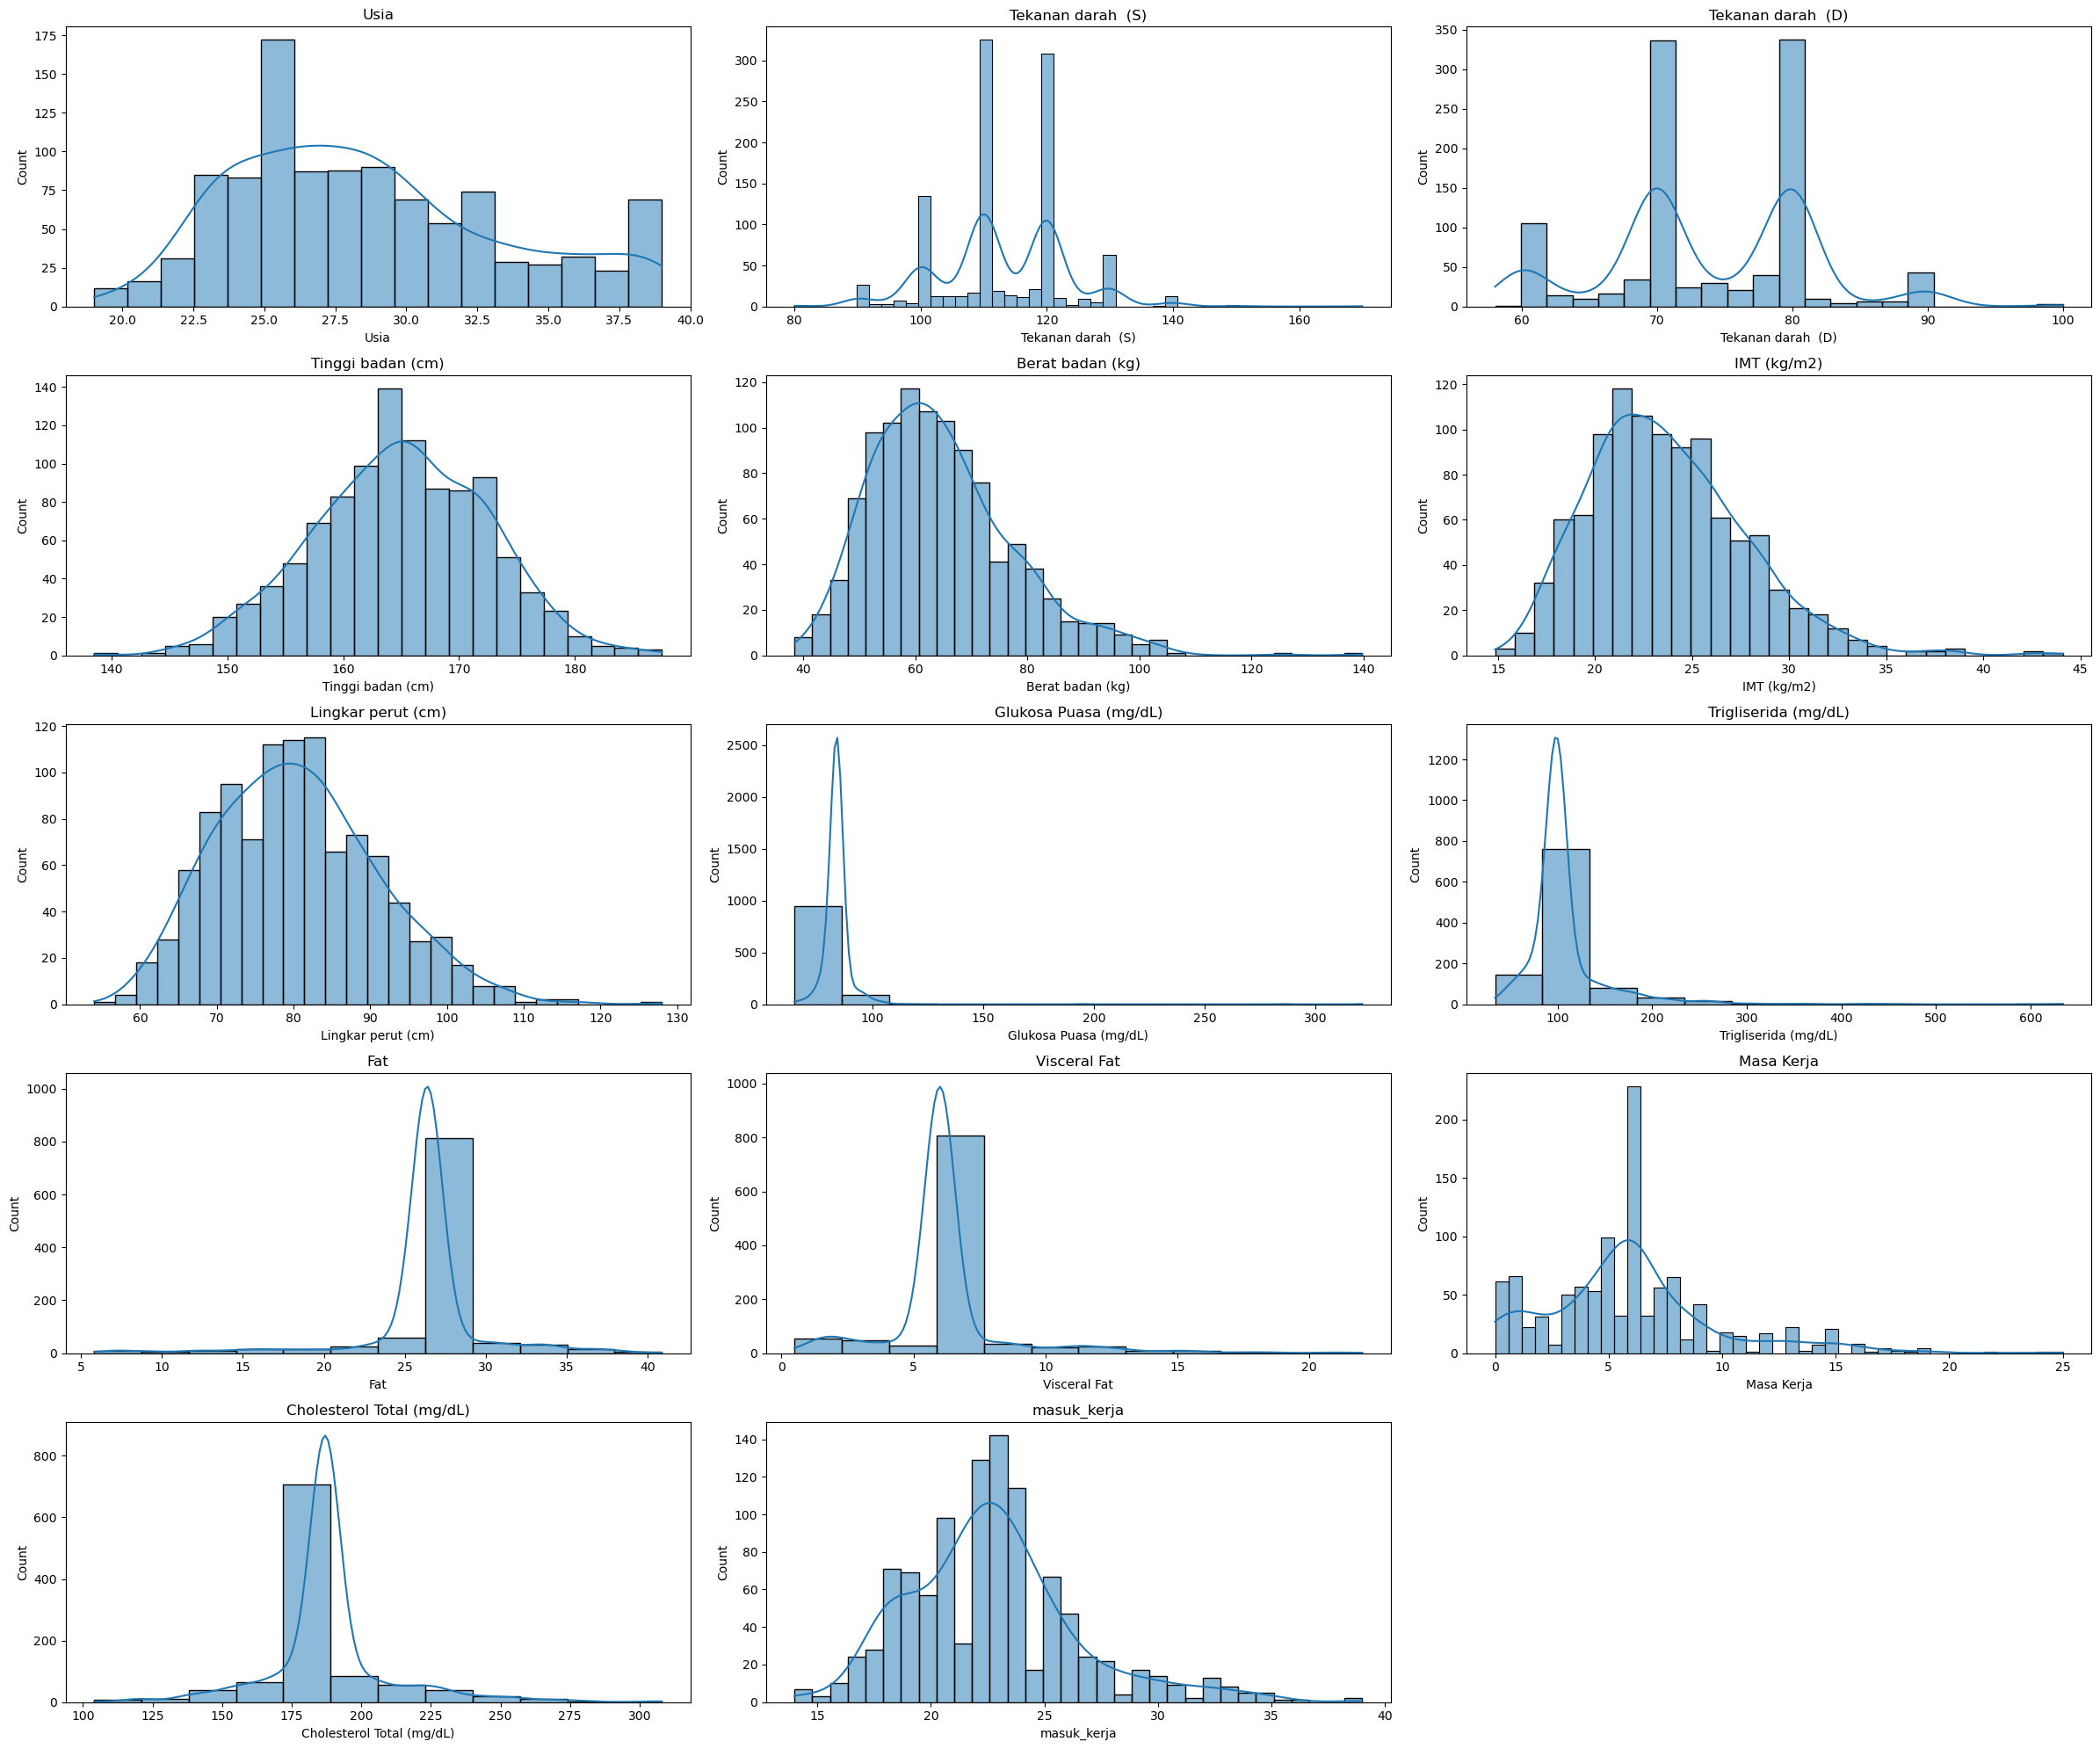

In [8]:
plt.figure(figsize=(24,20))
num_features = df.select_dtypes(include="number").columns

for i, column in enumerate(num_features, 1):
    plt.subplot(5,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

Selanjutnya membuat list yang berisi fitur-fitur yang akan ditransformasi

In [9]:
# fitur yg ditransformasi
transform_features = ['Glukosa Puasa (mg/dL)', 'Trigliserida (mg/dL)', 'Visceral Fat', 'Fat']

### Outlier

Langkah ini digunakan untuk mengeksplorasi keberadaan outlier pada setiap fitur numerik dalam dataset. Dengan menggunakan boxplot, distribusi data divisualisasikan berdasarkan nilai kuartil dan outlier. Kode ini secara otomatis membuat subplot untuk masing-masing kolom numerik menggunakan sns.boxplot(). Ukuran gambar disesuaikan melalui plt.figure(figsize=(14,10)) agar hasil visualisasi tetap jelas dan rapi. Visualisasi ini sangat bermanfaat untuk mendeteksi nilai-nilai ekstrem yang dapat memengaruhi performa model, sehingga bisa dipertimbangkan untuk ditangani di tahap prapemrosesan.

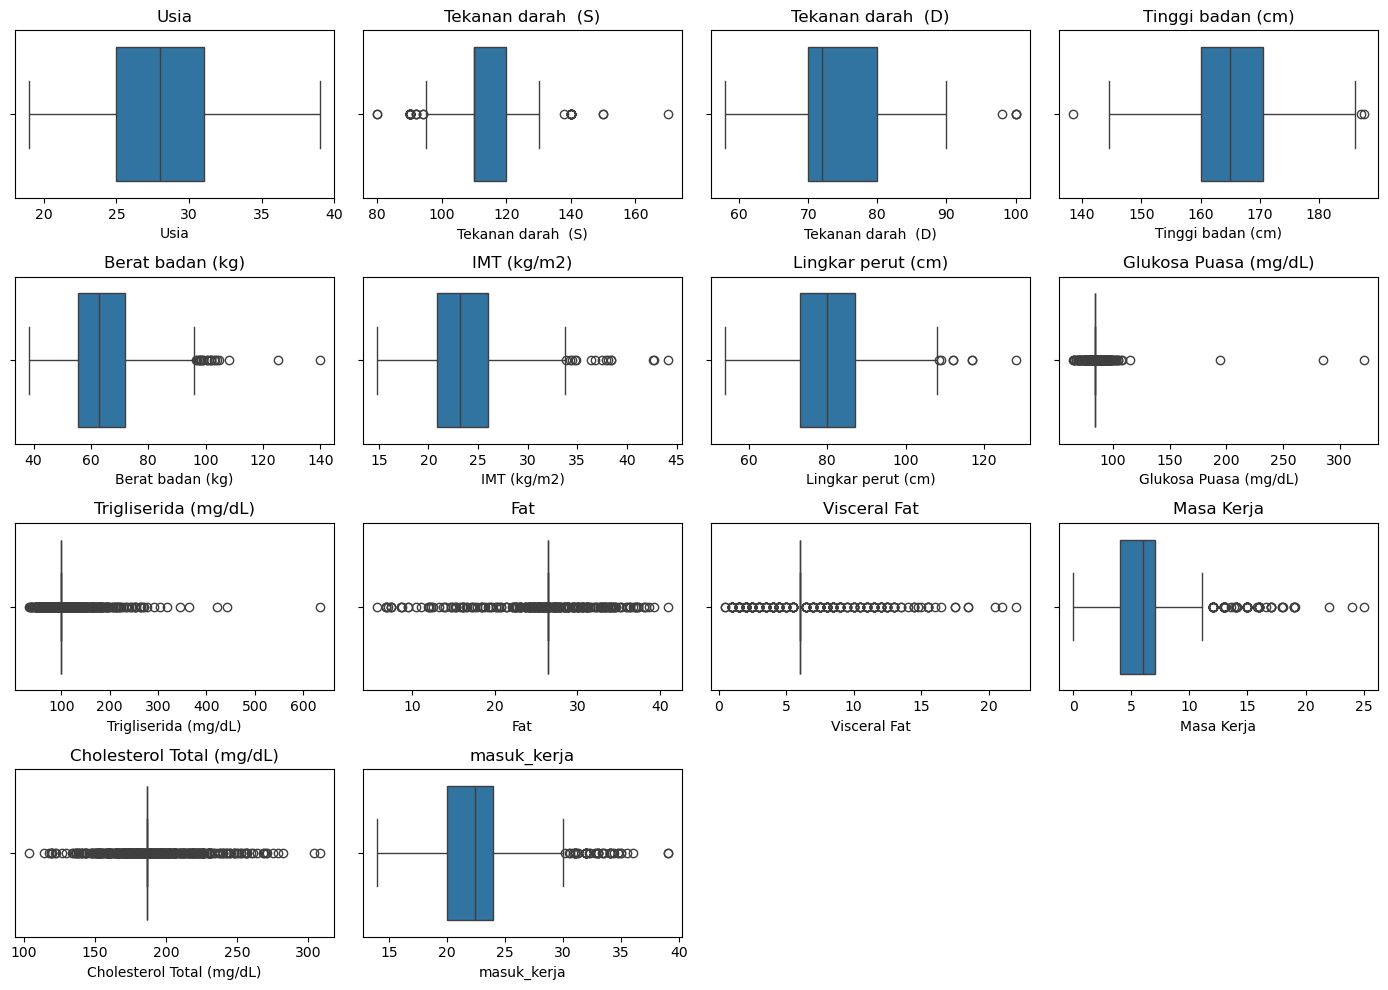

In [10]:
plt.figure(figsize=(14,10))

for i, column in enumerate(num_features, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Terlihat banyak fitur yang memiliki outlier, tetapi pada proyek ini outlier tidak akan dihapus karena outlier tersebut bukan merupakan kesalahan input, melainkan mencerminkan kondisi kesehatan aktual dari individu dalam data. Menghapus outlier justru berisiko menghilangkan informasi penting, terutama dalam konteks kesehatan di mana nilai ekstrem bisa menjadi indikasi kondisi serius yang relevan untuk prediksi kadar kolesterol. Oleh karena itu, pendekatan yang dipilih adalah membiarkan outlier tetap ada dan mengandalkan model yang cukup robust terhadap outlier, seperti Random Forest atau XGBoost.

Namun, transformasi seperti log transform akan diterapkan untuk mengurangi skewed yang terlihat pada visualisasi distribusi sebelumnya. Selain mengurangi efek skewed, transformasi mampu mengurangi efek outlier ekstrem terhadap distribusi data dan kestabilan model. 

### Data Categorical

Pada tahap ini, dilakukan visualisasi untuk melihat distribusi kategori pada fitur "Jenis Kelamin" menggunakan countplot dari library Seaborn. Visualisasi ini berguna untuk mengetahui proporsi antara kategori laki-laki dan perempuan dalam dataset. Ukuran gambar diperbesar dengan plt.figure(figsize=(24, 20)) agar hasil plot tampil lebih jelas. Judul ditambahkan untuk memperjelas isi grafik, dan label pada sumbu-x diputar 45 derajat untuk meningkatkan keterbacaan.

Langkah ini penting untuk memastikan bahwa tidak terjadi ketidakseimbangan kelas (class imbalance) pada fitur kategorik, yang dapat memengaruhi hasil analisis atau performa model prediksi jika fitur tersebut digunakan.

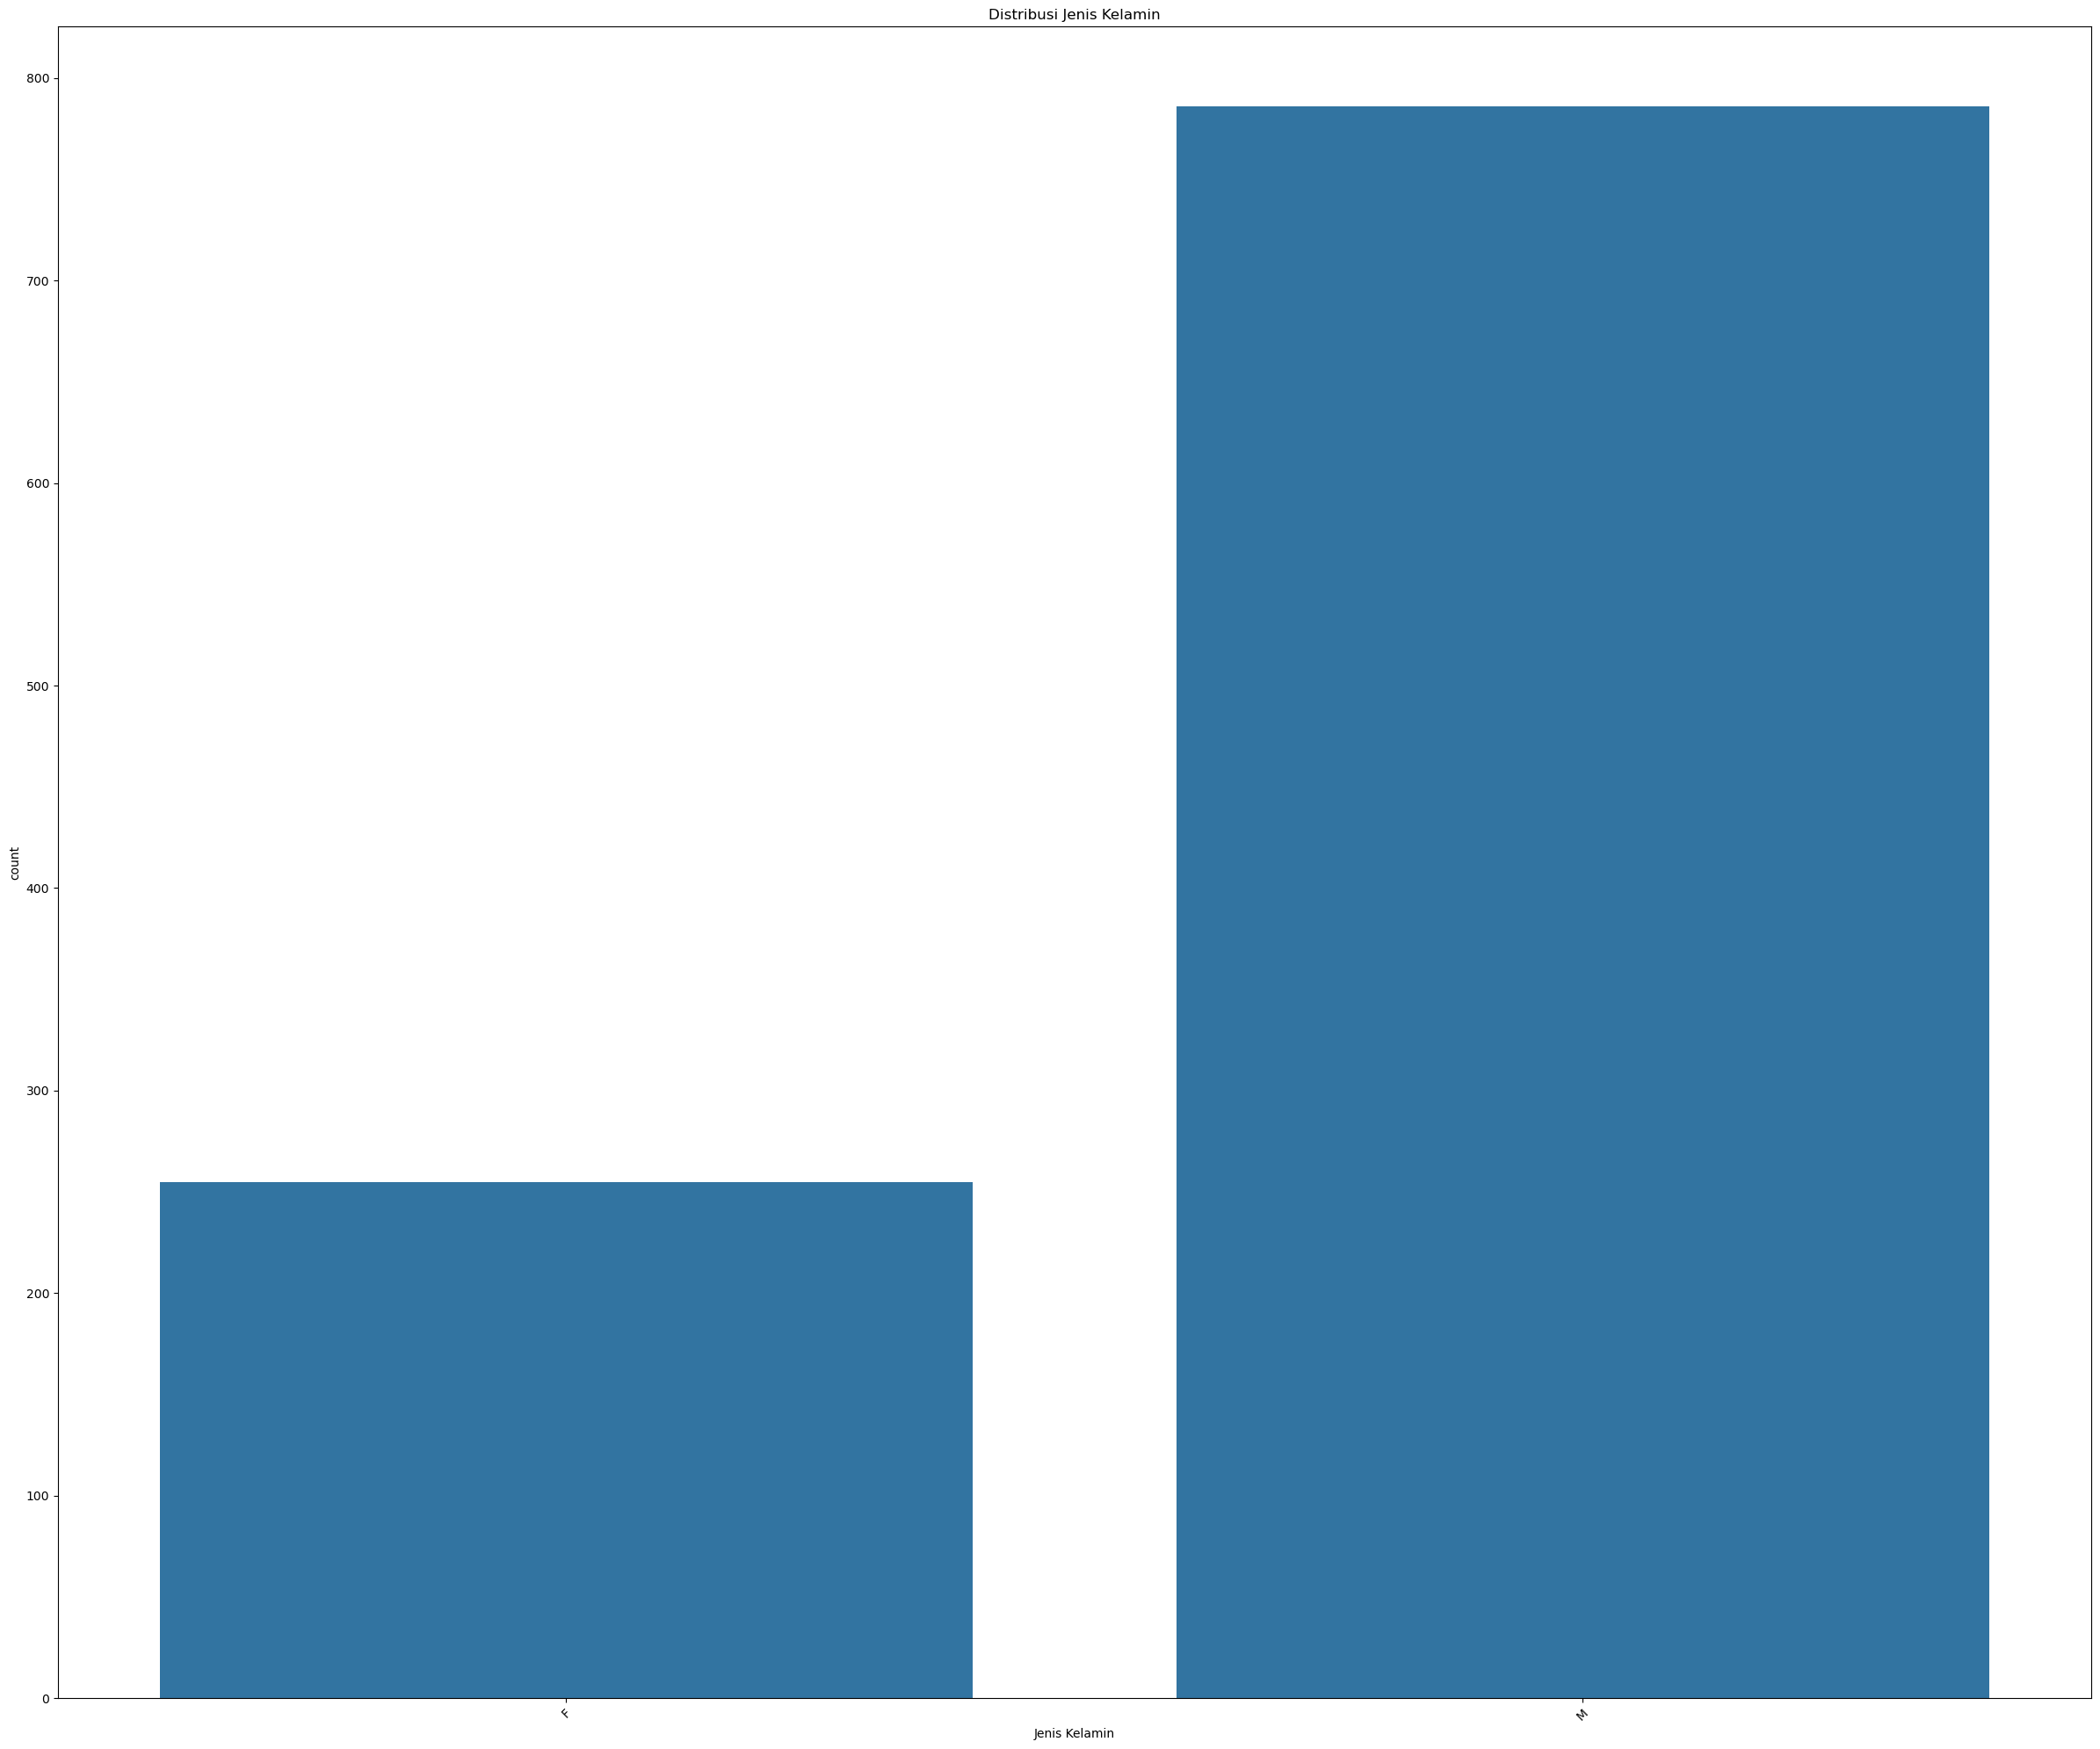

In [ ]:
plt.figure(figsize=(24, 20))
cat_features = df.select_dtypes(include="object").columns

sns.countplot(data=df, x="Jenis Kelamin")
plt.title(f'Distribusi {"Jenis Kelamin"}')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Berdasarkan informasi dari grafik di atas,laki-laki (M) jauh lebih banyak dari perempuan (F), sekitar 75% vs 25%. Hal tersebut menyebabkan distribusinya sangat tidak seimbang.

## Analysis Multivariate

Seperti pada Analysis Univariate, analysis multivariate ini akan dibagi menjadi dua yaitu numarik dan kategorik

### Data Categorical

Kode ini digunakan untuk menghitung rata-rata kadar kolesterol total berdasarkan kategori Jenis Kelamin. Proses ini dilakukan dengan cara mengelompokkan data (groupby) berdasarkan nilai pada kolom "Jenis Kelamin", lalu menghitung nilai mean dari kolom "Cholesterol Total (mg/dL)" untuk setiap kelompok. Fungsi reset_index() digunakan agar hasilnya ditampilkan dalam format DataFrame yang rapi dan tidak berupa index bertingkat.

In [12]:
df.groupby('Jenis Kelamin')[['Cholesterol Total (mg/dL)']].mean().reset_index()

,Jenis Kelamin,Cholesterol Total (mg/dL)
0,F,190.650980
1,M,187.820611


Mean dari kedua kategori fitur Jenis Kelamin tidak jauh berbeda, kemungkinan fitur ini tidak terlalu berpengaruh terhadap target

Sebelumnya telah dihitung bahwa terdapat perbedaan rata-rata kadar kolesterol total antara kelompok laki-laki dan perempuan. Namun, untuk memastikan apakah perbedaan ini benar-benar signifikan secara statistik dan bukan disebabkan oleh variasi acak, dilakukan uji t dua sampel independen (Welch’s t-test).

Hasil uji ini menghasilkan p-value sebesar [masukkan nilai]. Jika nilai p tersebut kurang dari 0.05, maka perbedaan rata-rata dianggap signifikan, yang berarti jenis kelamin memiliki pengaruh terhadap kadar kolesterol total. Sebaliknya, jika p-value lebih besar dari 0.05, maka perbedaan yang terlihat sebelumnya tidak cukup kuat untuk dinyatakan signifikan secara statistik.

Dengan demikian, uji ini memperkuat analisis deskriptif sebelumnya dengan bukti inferensial.

In [47]:
chol_M = df[df['Jenis Kelamin'] == 'M']['Cholesterol Total (mg/dL)']
chol_F = df[df['Jenis Kelamin'] == 'F']['Cholesterol Total (mg/dL)']

t_stat, p_value = ttest_ind(chol_M, chol_F, equal_var=False)
print(f'p-value: {p_value}')


p-value: 0.08470430714087634


Berdasarkan analisis di atas, fitur Jenis Kelamin tidak terlalu memengaruhi target

### Data Numerik

Pada tahap ini, dibuat visualisasi heatmap korelasi untuk melihat hubungan linear antar fitur numerik dalam dataset. Dengan menggunakan df.corr(numeric_only=True), hanya kolom bertipe numerik yang disertakan dalam perhitungan korelasi. Fungsi sns.heatmap() dari Seaborn digunakan untuk menampilkan matriks korelasi secara visual, di mana setiap sel menunjukkan nilai korelasi Pearson antara dua fitur, dan annot=True digunakan agar nilai korelasinya ditampilkan langsung dalam kotak.

<Axes: >

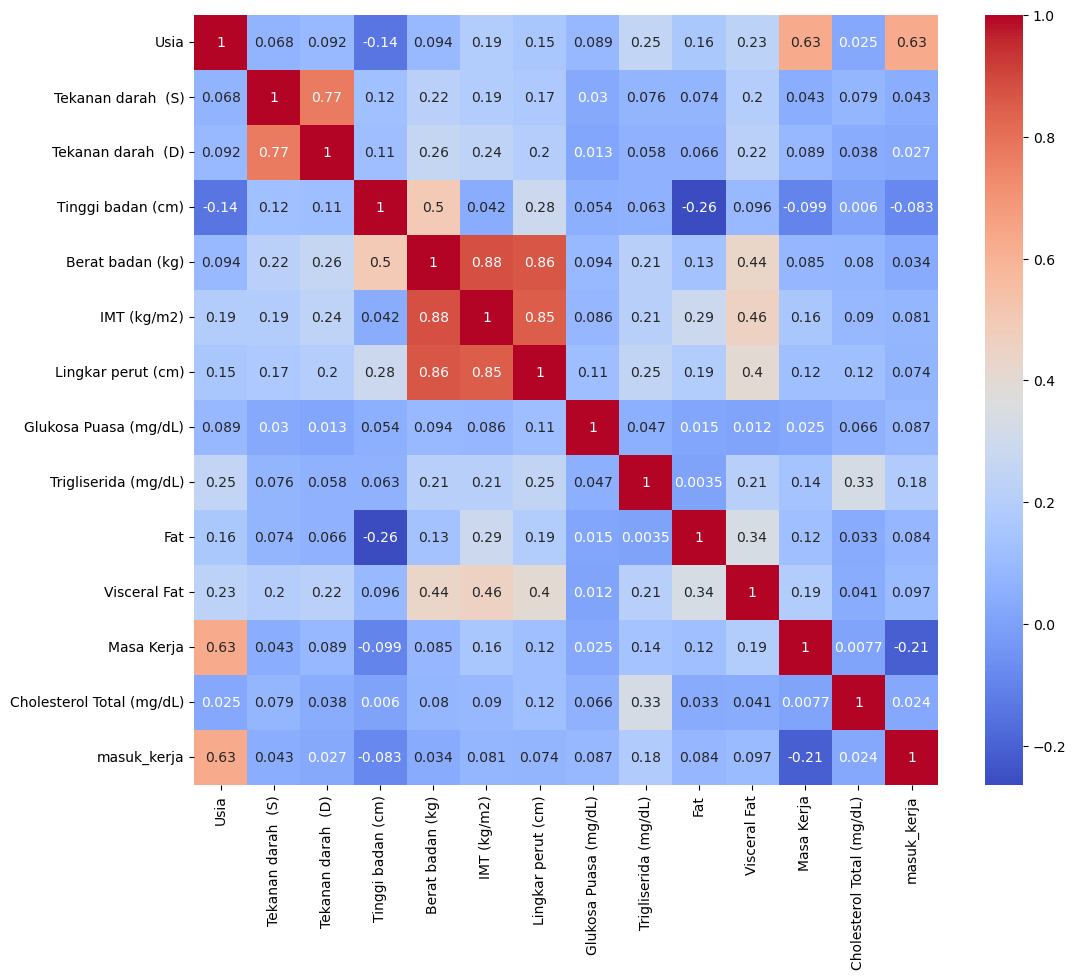

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


Berdasarkan Heatmap di atas hubungan korelasi fitur dengan target sebagai berikut
* **Trigliserida** adalah satu-satunya fitur dengan korelasi moderat dan dapat diprioritaskan dalam pemodelan.
* Sebagian besar fitur lainnya memiliki korelasi **lemah hingga sangat lemah**, sehingga perlu diuji lebih lanjut melalui modeling, bukan hanya korelasi.

Berdasarkan visualisasi **heatmap korelasi**, saya melakukan analisis untuk mengidentifikasi potensi **multikolinearitas antar fitur**:

* Fitur **Usia** menunjukkan korelasi moderat dengan **Masa Kerja** dan **Masuk Kerja** (r ≈ 0.6), mencerminkan hubungan logis antara lama bekerja dan umur.
* **Tekanan darah sistolik (S)** berkorelasi kuat dengan **diastolik (D)** (r = 0.77), sesuai dengan karakteristik fisiologis tekanan darah.
* **Tinggi badan** memiliki korelasi moderat dengan **berat badan** (r ≈ 0.5).
* Terdapat korelasi sangat kuat (r > 0.8) antara:

  * **Berat badan**, **IMT**, dan **Lingkar Perut**

Ketiga fitur tersebut mengindikasikan **status kelebihan berat badan**, sehingga berpotensi menyebabkan **multikolinearitas** dalam model regresi linear.

# Data preparation

### Menghapus kolom yang kurang relevan

Pada tahap ini, dilakukan penghapusan dua kolom dari dataset, yaitu "Tempat lahir" dan "masuk_kerja", menggunakan fungsi drop() dengan parameter inplace=True agar perubahan langsung diterapkan ke DataFrame utama.

Kolom "Tempat lahir" dihapus karena bersifat kategorikal non-numerik yang tidak relevan terhadap prediksi kolesterol serta tidak memiliki nilai informasi yang signifikan untuk pemodelan.
Sementara kolom "masuk_kerja" kemungkinan dihapus karena berisi informasi tanggal atau data waktu yang tidak diolah lebih lanjut, atau karena mengandung banyak nilai yang tidak konsisten seperti usia negatif saat masuk kerja.

Langkah ini bertujuan untuk menyederhanakan dataset dan menghindari fitur-fitur yang berpotensi mengganggu proses pelatihan model.

In [15]:
df.drop(columns=['Tempat lahir', 'masuk_kerja'], inplace=True)

### Splitting Data

Pada tahap ini, dataset dipisahkan menjadi fitur (X) dan target (y), di mana "Cholesterol Total (mg/dL)" dijadikan target yang akan diprediksi, sementara kolom lainnya digunakan sebagai input model. Langkah ini penting untuk mempersiapkan data sebelum proses pelatihan model machine learning.

In [17]:
X = df.drop(columns=['Cholesterol Total (mg/dL)'])
y = df['Cholesterol Total (mg/dL)']

Dataset dibagi menjadi tiga bagian: train (60%), validasi (20%), dan test (20%) menggunakan fungsi train_test_split(). Pembagian ini bertujuan untuk melatih model, menyetel hyperparameter, dan menguji performa akhir secara terpisah agar hasil evaluasi lebih objektif.

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2 

### Transformasi log Data

Dilakukan transformasi logaritmik (log1p) terhadap fitur-fitur tertentu pada data train dan validasi untuk mengurangi skewness dan mengendalikan outlier. Fungsi log1p digunakan karena lebih aman untuk data dengan nilai nol, dan transformasi ini membantu model belajar lebih stabil terhadap distribusi yang tidak normal.

In [19]:
# Transformasi log1p dan buat kolom baru untuk data train dan validasi
for col in transform_features:
    X_train[col] = np.log1p(X_train[col])

for col in transform_features:
    X_val[col] = np.log1p(X_val[col])

### One-Hot Encoding

Pada tahap ini, dilakukan inisialisasi dan pelatihan One-Hot Encoder terhadap fitur kategorikal "Jenis Kelamin" pada data training. Parameter drop='first' digunakan untuk menghindari dummy trap, sementara handle_unknown='ignore' memastikan encoder tetap aman jika ada kategori baru saat inference.

In [21]:
# Inisialisasi encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit di training set
X_train_cat = X_train[['Jenis Kelamin']]  # ambil fitur kategorikal
encoder.fit(X_train_cat)


OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

Dibuat fungsi onehot_encoder untuk menerapkan One-Hot Encoding pada fitur "Jenis Kelamin" menggunakan encoder yang telah di-fit sebelumnya, lalu hasil encoding digabungkan kembali dengan fitur numerik lainnya. Fungsi ini kemudian digunakan untuk mentransformasi data training dan validasi agar siap digunakan dalam pemodelan machine learning.

In [22]:
# Fungsi untuk one-hot encode kolom Jenis Kelamin menggunakan encoder yang sudah di-fit
def onehot_encoder(data, encoder):
    
    # Transform data kategorikal
    data_cat = data[['Jenis Kelamin']]
    data_encoded = encoder.transform(data_cat)

    # Ambil nama kolom hasil encoding
    encoded_columns = encoder.get_feature_names_out(['Jenis Kelamin'])

    # Buat DataFrame encoding
    encoded_df = pd.DataFrame(data_encoded, columns=encoded_columns, index=data.index)

    # Gabungkan dengan data numerik
    new_data = pd.concat([data.drop(columns=['Jenis Kelamin']), encoded_df], axis=1)

    return new_data

# Transform data testing menggunakan encoder yang sudah di-fit
X_train_encoder = onehot_encoder(X_train, encoder)
X_val_encoder = onehot_encoder(X_val, encoder)

### Standarisasi

roses standarisasi dilakukan setelah data dibagi menjadi training dan testing, sehingga tidak perlu memisahkan ulang. Untuk mempermudah penggunaan dan menjaga konsistensi antar data, proses standarisasi akan dibungkus ke dalam sebuah fungsi agar dapat digunakan kembali pada data validasi maupun data uji.

In [23]:
def standardize_data(data, scaler=None):
    num_features = data.select_dtypes(include="number").columns
    cat_features = data.drop(columns=num_features)

    is_new_scaler = scaler is None
    if is_new_scaler:
        scaler = StandardScaler().fit(data[num_features])

    scaled_array = scaler.transform(data[num_features])
    scaled_df = pd.DataFrame(scaled_array, columns=num_features, index=data.index)
    final_data = pd.concat([scaled_df, cat_features], axis=1)

    return (final_data, scaler) if is_new_scaler else final_data


# Standarisasi data
X_train_scaler, scaler = standardize_data(X_train_encoder)
X_val_scaler = standardize_data(X_val_encoder, scaler)

##  Seleksi Fitur

Dalam proyek ini, akan dilakukan **tiga eksperimen data** yang dirancang untuk mengevaluasi pengaruh pemilihan fitur dan teknik transformasi terhadap performa model dalam memprediksi kadar kolesterol total. Masing-masing eksperimen menggunakan pendekatan yang berbeda untuk membandingkan hasil secara adil dan menyeluruh:

###  Eksperimen 1: Semua Fitur Asli

Menggunakan seluruh fitur numerik dan kategorikal yang tersedia, tanpa seleksi atau penghapusan fitur multikolinear. Ini menjadi baseline awal untuk melihat performa model berdasarkan data mentah.



In [ ]:
# dataset untuk ekperimen 1
X_train_exp1 = X_train_scaler
X_val_exp1 = X_val_scaler

### Eksperimen 2: Fitur Terpilih (Tanpa Multikolinearitas)

Eksperimen ini secara khusus menghilangkan **fitur-fitur yang memiliki korelasi sangat tinggi satu sama lain** (multikolinearitas). Tiga fitur — **IMT**, **berat badan**, dan **lingkar perut** — diketahui memiliki korelasi sangat tinggi (nilai korelasi > 0.8). Untuk menghindari redundansi informasi dan potensi bias model, hanya satu dari ketiganya yang dipilih sebagai representasi, yaitu **IMT**. Pendekatan ini bertujuan untuk menyederhanakan model dan meningkatkan kemampuannya dalam generalisasi.



In [25]:
# dataset untuk eksperimen 2
X_train_exp2 = X_train_scaler.drop(columns=["Berat badan (kg)", "Lingkar perut (cm)"])
X_val_exp2 = X_val_scaler.drop(columns=["Berat badan (kg)", "Lingkar perut (cm)"])

### Eksperimen 3: Reduksi Dimensi dengan PCA

Eksperimen terakhir menggunakan teknik **Principal Component Analysis (PCA)** untuk mereduksi dimensi fitur numerik. PCA secara otomatis menangani multikolinearitas dan berfokus pada menangkap sebanyak mungkin variasi data menggunakan lebih sedikit komponen.

Ketiga eksperimen ini akan dievaluasi menggunakan model dan metrik yang sama agar hasilnya dapat dibandingkan secara objektif.

In [ ]:
# dataset untuk eksperimen 3
X_train_exp3 = X_train_scaler.copy()
X_val_exp3 = X_val_scaler.copy()

pca = PCA(n_components=3, random_state=123)
pca.fit(X_train_exp3[["Berat badan (kg)", "Lingkar perut (cm)", "IMT (kg/m2)"]])
princ_comp = pca.transform(X_train_exp3[["Berat badan (kg)", "Lingkar perut (cm)", "IMT (kg/m2)"]])

In [27]:
pca.explained_variance_ratio_.round(3)

array([0.91 , 0.051, 0.039])

Pada eksperimen ketiga, dilakukan reduksi dimensi menggunakan teknik Principal Component Analysis (PCA) untuk menyederhanakan struktur fitur numerik tanpa kehilangan banyak informasi. Berdasarkan nilai explained_variance_ratio_, dua komponen utama pertama mampu menjelaskan sekitar 96% total variasi data, sehingga dipilih sebagai representasi fitur baru yang cukup informatif. Pendekatan ini tidak hanya membantu mengatasi potensi multikolinearitas, tetapi juga meningkatkan efisiensi model dengan mengurangi kompleksitas input tanpa mengorbankan akurasi prediksi secara signifikan.

In [28]:
# PCA dengan 2 komponen
pca = PCA(n_components=2, random_state=123)
pca.fit(X_train_exp3[["Berat badan (kg)", "Lingkar perut (cm)", "IMT (kg/m2)"]])

X_train_exp3[['PC1', 'PC2']] = pca.transform(X_train_exp3[["Berat badan (kg)", "Lingkar perut (cm)", "IMT (kg/m2)"]])
X_train_exp3.drop(columns=["Berat badan (kg)", "Lingkar perut (cm)", "IMT (kg/m2)"], inplace=True)

X_val_exp3[['PC1', 'PC2']] = pca.transform(X_val_exp3[["Berat badan (kg)", "Lingkar perut (cm)", "IMT (kg/m2)"]])
X_val_exp3.drop(columns=["Berat badan (kg)", "Lingkar perut (cm)", "IMT (kg/m2)"], inplace=True)

# Modelling

Model yang digunakan adalah regresi linier, regresi linier dengan regularisasi lasso, Random forest, dan XGboost. Semua model akan dibungkus di dalam dictionary untuk memperudah proses training dan evaluasi

In [31]:
models = {
    "Random Forest": RandomForestRegressor(random_state=123),
    "XGBoost": XGBRegressor(random_state=123),
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1, random_state=123)
}

# Evaluasi

Pertama membuat fungsi untuk evaluasi agar tidak perlu membuat kode evaluasi dari awal setiap akan melakukan evaluasi percobaan. 

In [30]:
def evaluate_model(y_true, y_pred, model_name, exp_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {
        "Eksperimen": exp_name,
        "Model": model_name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 4)
    }

Training dan evaluasi dilakukan secara berurutan. Selain data validasi, data training juga masuk ke evaluasi untuk mengetahui apakah model mengalami overfitting atau tidak.

In [ ]:
results = []

for i, (X_train, X_val) in enumerate([
    (X_train_exp1, X_val_exp1),
    (X_train_exp2, X_val_exp2),
    (X_train_exp3, X_val_exp3)
]):
    exp_name = f"Eksperimen {i+1}"

    for name, model in models.items():
        model.fit(X_train, y_train)

        # --- Evaluasi di Train Set ---
        y_train_pred = model.predict(X_train)
        train_result = evaluate_model(y_train, y_train_pred,
                                      model_name=f"{name} (Train)",
                                      exp_name=exp_name)
        results.append(train_result)

        # --- Evaluasi di Test Set ---
        y_test_pred = model.predict(X_val)
        test_result = evaluate_model(y_val, y_test_pred,
                                     model_name=f"{name} (Test)",
                                     exp_name=exp_name)
        results.append(test_result)

# Simpan ke DataFrame
eval_df = pd.DataFrame(results).set_index(["Eksperimen", "Model"])


eval_df

MAE   RMSE      R2
Eksperimen   Model                                          
Eksperimen 1 Random Forest (Train)       3.99   7.48  0.8745
             Random Forest (Test)       10.63  19.80 -0.0140
             XGBoost (Train)             0.13   0.20  0.9999
             XGBoost (Test)             11.70  20.73 -0.1108
             Linear Regression (Train)  11.60  18.81  0.2057
             Linear Regression (Test)   11.09  18.28  0.1357
             Lasso (Train)              11.44  18.84  0.2036
             Lasso (Test)               10.89  18.18  0.1452
Eksperimen 2 Random Forest (Train)       3.96   7.45  0.8754
             Random Forest (Test)       10.61  19.85 -0.0185
             XGBoost (Train)             0.17   0.26  0.9998
             XGBoost (Test)             12.06  21.75 -0.2228
             Linear Regression (Train)  11.50  18.88  0.2002
             Linear Regression (Test)   10.87  18.13  0.1501
             Lasso (Train)              11.40  18.88  0.1997
             Lasso (Test)               10.83  18.12  0.1511
Eksperimen 3 Random Forest (Train)       3.91   7.35  0.8789
             Random Forest (Test)       10.58  19.93 -0.0273
             XGBoost (Train)             0.13   0.19  0.9999
             XGBoost (Test)             11.81  21.65 -0.2116
             Linear Regression (Train)  11.57  18.83  0.2043
             Linear Regression (Test)   10.98  18.23  0.1408
             Lasso (Train)              11.44  18.84  0.2036
             Lasso (Test)               10.89  18.19  0.1448

Berdasarkan hasil evaluasi pada data validasi, baik **Random Forest** maupun **XGBoost** menunjukkan indikasi **overfitting** pada seluruh eksperimen. Hal ini terlihat dari nilai koefisien determinasi (**R²**) yang sangat tinggi pada data pelatihan (**R² > 0.86**) namun sangat rendah pada data validasi (**R² < 0.01**), menandakan bahwa model sangat baik dalam mengenali pola pada data pelatihan, tetapi gagal melakukan generalisasi ke data baru.

Sebaliknya, model **Linear Regression** dan **Lasso Regression** menunjukkan gejala **underfitting**, dengan nilai R² yang rendah baik pada data pelatihan maupun validasi (sekitar **R² ≈ 0.15**). Ini mengindikasikan bahwa model terlalu sederhana untuk menangkap pola dari data.

Berdasarkan hasil tersebut, langkah selanjutnya adalah melakukan **tuning hyperparameter** pada model yang menunjukkan potensi performa lebih baik, seperti **Random Forest** dan **XGBoost**, untuk mengurangi overfitting dan meningkatkan generalisasi.


Berdasarkan hasil evaluasi, **Eksperimen 2 direkomendasikan sebagai dasar untuk melakukan hyperparameter tuning pada model Random Forest dan XGBoost**. Meskipun semua eksperimen menunjukkan gejala overfitting, Eksperimen 2 memiliki nilai R² pada data uji yang paling mendekati nol (-0.0185), dibanding eksperimen lain, yang mengindikasikan potensi generalisasi model yang sedikit lebih baik. Nilai R² pada data latih sebesar 0.8754 menunjukkan bahwa model mampu mempelajari pola dari data dengan cukup baik, dan selisih antara performa train dan test lebih kecil dibanding eksperimen lainnya. Oleh karena itu, Eksperimen 2 memberikan titik awal yang lebih stabil untuk upaya peningkatan performa model melalui tuning.


In [ ]:
# Parameter grid untuk Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Parameter grid untuk XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Fungsi evaluasi
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

# === GANTI variabel berikut dengan milikmu ===
# X_train, y_train: data training
# X_val, y_val: data validasi

# Tuning Random Forest
rf = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=20, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
rf_search.fit(X_train_exp2, y_train)

# Evaluasi
rf_best = rf_search.best_estimator_
rf_val_preds = rf_best.predict(X_val_exp2)
rf_eval = evaluate_model(y_val, rf_val_preds)

# Tuning XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=20, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
xgb_search.fit(X_train_exp2, y_train)

# Evaluasi
xgb_best = xgb_search.best_estimator_
xgb_val_preds = xgb_best.predict(X_val_exp2)
xgb_eval = evaluate_model(y_val, xgb_val_preds)

# Tampilkan hasil
print("Random Forest Best Params:", rf_search.best_params_)
print("Random Forest Validation Performance:", rf_eval)
print("\nXGBoost Best Params:", xgb_search.best_params_)
print("XGBoost Validation Performance:", xgb_eval)

Random Forest Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 5}
Random Forest Validation Performance: {'MAE': 10.560943193010575, 'RMSE': np.float64(19.247647120235662), 'R2': 0.04219565500849598}

XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
XGBoost Validation Performance: {'MAE': 10.567284804124098, 'RMSE': np.float64(18.954995593744403), 'R2': 0.07110017141339808}


## Analisis SHAP

Analisis SHAP dilakukan dengan bantuan shap. Pada prosesnya kita hanya perlu melihat grafik dari hasil evaluasi SHAP tanpa membuat kode dari awal.

c:\Users\USER\anaconda3\envs\ujicoba\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


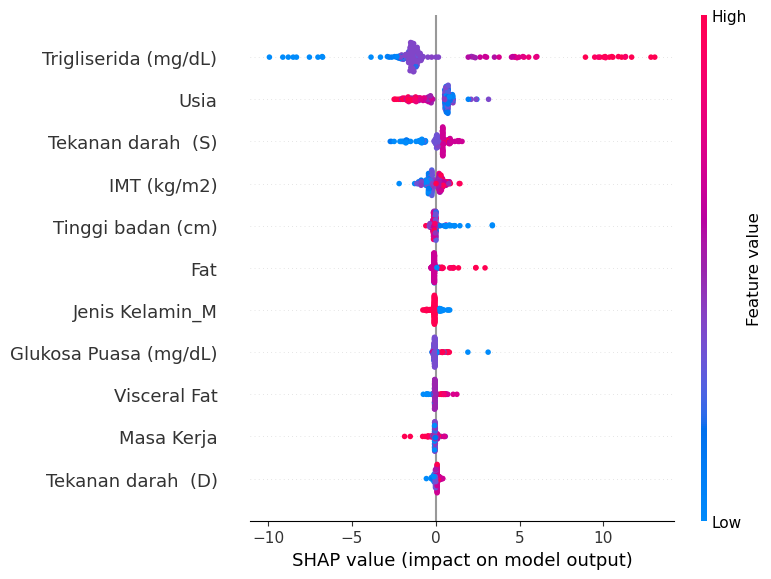

In [37]:
import shap

rf_best = xgb_search.best_estimator_

# Inisialisasi explainer
explainer = shap.TreeExplainer(rf_best)

# Hitung SHAP values
shap_values = explainer.shap_values(X_val_exp2)

# Visualisasi global feature importance
shap.summary_plot(shap_values, X_val_exp2)

# Visualisasi lokal (per individu)
shap.force_plot(explainer.expected_value, shap_values[0], X_val_exp2.iloc[0])


Berdasarkan interpretasi SHAP, fitur Trigliserida, Usia, dan Indeks Massa Tubuh (IMT) secara konsisten memberikan kontribusi terbesar terhadap prediksi model. Nilai tinggi dari ketiga fitur tersebut cenderung menaikkan hasil prediksi, sejalan dengan pengetahuan medis yang menyatakan bahwa faktor-faktor tersebut berkaitan erat dengan peningkatan kadar kolesterol total.

Fitur Tekanan Darah Sistolik menunjukkan pengaruh sedang terhadap prediksi. Nilainya yang tinggi dapat meningkatkan prediksi model, meskipun dampaknya tidak sebesar tiga fitur utama di atas. Oleh karena itu, fitur ini tetap relevan dan dapat dipertimbangkan untuk dipertahankan dalam model.

Sebaliknya, fitur-fitur seperti Masa Kerja dan Tinggi Badan menunjukkan dampak yang sangat kecil terhadap output model, sehingga dapat dipertimbangkan untuk dieliminasi dalam rangka menyederhanakan model tanpa mengorbankan performa secara signifikan.

In [38]:
top_features = ['Trigliserida (mg/dL)', 'Usia', 'Tekanan darah  (S)', 'IMT (kg/m2)', 'Tinggi badan (cm)', 'Fat']

for i in range(3, len(top_features)+1):
    X_train_top = X_train_exp2[top_features[:i]]
    X_val_top = X_val_exp2[top_features[:i]]
    model_xgb = XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
        )

    # Fit model ke data pelatihan (menggunakan fitur top dari SHAP)
    model_xgb.fit(X_train_top, y_train)

    # Prediksi
    train_predict = model_xgb.predict(X_train_top)
    val_predict = model_xgb.predict(X_val_top)

    train = evaluate_model(y_train, train_predict)
    val = evaluate_model(y_val, val_predict)

    print(f'top {i} features')
    print(f'Hasil data train {train}')
    print(f'Hasil data validasi {val}')
    print("\n")

top 3 features
Hasil data train {'MAE': 9.944776314955492, 'RMSE': np.float64(18.509266947728236), 'R2': 0.23104892726669957}
Hasil data validasi {'MAE': 10.426056348360502, 'RMSE': np.float64(18.954907792408097), 'R2': 0.07110877689757755}


top 4 features
Hasil data train {'MAE': 9.764106090252216, 'RMSE': np.float64(18.26320770935128), 'R2': 0.2513576589515578}
Hasil data validasi {'MAE': 10.489165159372183, 'RMSE': np.float64(18.882859073706385), 'R2': 0.0781568965125139}


top 5 features
Hasil data train {'MAE': 9.64767583211263, 'RMSE': np.float64(18.03501045160136), 'R2': 0.2699492259832915}
Hasil data validasi {'MAE': 10.55509405869704, 'RMSE': np.float64(18.976571193584174), 'R2': 0.06898431999122634}


top 6 features
Hasil data train {'MAE': 9.687715432582758, 'RMSE': np.float64(18.13423479105616), 'R2': 0.2618939962335335}
Hasil data validasi {'MAE': 10.503899060762846, 'RMSE': np.float64(18.898087052570656), 'R2': 0.07666946628832105}




Dapat dilihat bahwa penggunaan empat fitur teratas menghasilkan nilai R² validasi tertinggi dibanding kombinasi fitur lainnya. Hal ini menunjukkan bahwa keempat fitur tersebut memberikan kontribusi paling optimal terhadap kemampuan model dalam menjelaskan variasi data, sekaligus menjaga keseimbangan antara kompleksitas dan performa prediktif.


## Evaluasi Akhir

Semua proses mulai dari preprocessing hingga modelling dilakukan lagi dengan data gabungan data train dan data validasi dengan model akhir yang dipilih berdasarkan hasil evaluasi yang terbaik.

In [39]:
# karena data kategorik sudah tidak digunakan, maka tidak ada one-hot encoding
def preprocessing(data, scaler=None):
    features_important = ['Trigliserida (mg/dL)', 'Usia', 'Tekanan darah  (S)', 'IMT (kg/m2)']
    
    # Hanya ambil fitur penting dan buat salinan
    data = data[features_important].copy()

    # Transformasi log untuk Trigliserida
    data['Trigliserida (mg/dL)'] = np.log1p(data['Trigliserida (mg/dL)'])

    # Standarisasi
    result = standardize_data(data, scaler)

    # Tangani hasil return tergantung apakah scaler baru dibuat
    if scaler is None:
        data_scaled, scaler = result
        return data_scaled, scaler
    else:
        return result


X_temp_final, scaler = preprocessing(X_temp)
X_test_final = preprocessing(X_test, scaler)

Proses training dilakukan dengan hyperparameter yang dipilih dengan hasil terbaik pada proses hyperparameter tuning sebelumnya

In [41]:
model_xgb = XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
        )

model_xgb.fit(X_temp_final, y_temp)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Selanjutnya lakukan evaluasi dengan data train dan data test

In [42]:
temp_predict = model_xgb.predict(X_temp_final)
test_predict = model_xgb.predict(X_test_final)

result_temp = evaluate_model(y_temp, temp_predict)
result_test = evaluate_model(y_test, test_predict)

print("Data Train", result_temp)
print("Data Test", result_test)

Data Train {'MAE': 8.435299359835112, 'RMSE': np.float64(15.533410286262399), 'R2': 0.44077440684432134}
Data Test {'MAE': 11.724951420104105, 'RMSE': np.float64(22.22147121523914), 'R2': 0.07306270858706476}


Model akhir dievaluasi menggunakan metrik regresi standar, yaitu MAE, RMSE, dan R², pada data pelatihan dan data pengujian:

| Dataset   | MAE   | RMSE  | R²     |
| --------- | ----- | ----- | ------ |
| Train | 8.44  | 15.53 | 0.4408 |
| Test  | 11.72 | 22.22 | 0.0731 |

* R² sebesar 0.44 pada data latih menunjukkan bahwa model mampu menangkap sebagian pola dalam data.
* Namun, R² hanya 0.07 pada data uji mengindikasikan bahwa model masih **kurang mampu melakukan generalisasi** terhadap data baru.
* Selisih MAE dan RMSE yang cukup besar mengindikasikan adanya beberapa outlier yang menyebabkan error besar.

Model memiliki performa prediktif yang terbatas, dengan kemungkinan masih terdapat underfitting atau fitur yang belum cukup menjelaskan target secara menyeluruh. Meski demikian, model ini bisa menjadi baseline awal untuk pengembangan sistem prediksi kolesterol berbasis data sederhana.